# **SVM Model**

Model Accuracy: 0.9360100376411543


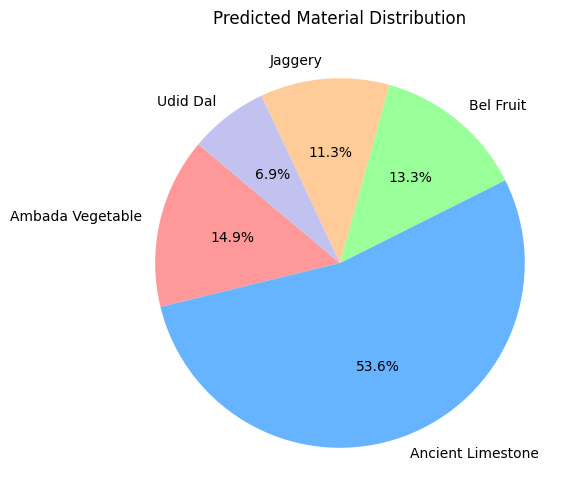

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

def load_data():
    """Loads data from CSV files and assigns labels."""
    file_paths = {
        "Ancient Limestone": "/content/Ancient_limestone_SF.csv",
        "Bel Fruit": "/content/Bel_Fruit_SF.csv",
        "Jaggery": "/content/Jaggery_SF.csv",
        "Ambada Vegetable": "/content/Ambada_SF.csv",
        "Udid Dal": "/content/Udid_dal_SF.csv"
    }

    data = []
    for label, file_path in file_paths.items():
        df = pd.read_csv(file_path)
        df['label'] = label
        data.append(df)

    return pd.concat(data, ignore_index=True)

def preprocess_data(data):
    """Preprocesses data for model training."""
    X = data.drop('label', axis=1)  # Features
    y = data['label']  # Labels

    # Convert labels to numerical format
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Impute missing values using the mean
    imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
    X = imputer.fit_transform(X)  # Impute missing values in X

    # Normalize the features
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    return X_train, X_test, y_train, y_test, y_test, label_encoder

def train_svm_model(X_train, y_train):
    """Trains an SVM model."""
    model = SVC(kernel='rbf', C=1.0, gamma='scale')
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    """Evaluates the model and prints accuracy."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Model Accuracy:", accuracy)
    return y_pred

def visualize_results(y_pred, label_encoder):
    """Visualizes the predicted material distribution."""
    class_counts = np.bincount(y_pred)
    labels = label_encoder.classes_

    plt.figure(figsize=(6, 6))
    plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=140,
            colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6"])
    plt.title("Predicted Material Distribution")
    plt.show()

# Main execution
data = load_data()
X_train, X_test, y_train, y_test, y, label_encoder = preprocess_data(data)
model = train_svm_model(X_train, y_train)
y_pred = evaluate_model(model, X_test, y_test)
visualize_results(y_pred, label_encoder)



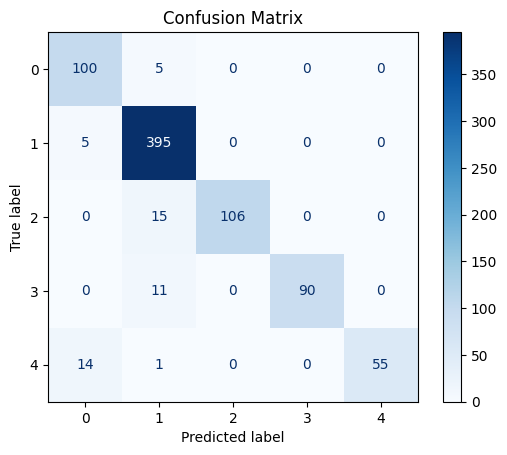

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # Change the color scheme to blue
plt.title("Confusion Matrix")
plt.show()

# **Comparitive**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

def load_data():
    """Loads data from CSV files and assigns labels."""
    file_paths = {
        "Ancient Limestone": "Ancient_limestone_SF.csv",
        "Bel Fruit": "Bel_Fruit_SF.csv",
        "Jaggery": "Jaggery_SF.csv",
        "Ambada Vegetable": "Ambada_SF.csv",
        "Udid Dal": "Udid_dal_SF.csv"
    }

    data = []
    for label, file_path in file_paths.items():
        df = pd.read_csv(file_path)
        df['label'] = label
        data.append(df)

    return pd.concat(data, ignore_index=True)

def preprocess_data(data):
    """Preprocesses data for model training."""
    X = data.drop('label', axis=1)
    y = data['label']

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    return X_train, X_test, y_train, y_test, label_encoder

def train_models(X_train, y_train):
    """Trains SVM and Logistic Regression models."""
    models = {
        "SVM": SVC(kernel='rbf', C=1.0, gamma='scale'),
        "Logistic Regression": LogisticRegression(max_iter=500)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models

def evaluate_models(models, X_test, y_test):
    """Evaluates models and prints accuracy & classification report."""
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Model Accuracy: {accuracy:.4f}")
        print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}\n")

def main():
    data = load_data()
    X_train, X_test, y_train, y_test, label_encoder = preprocess_data(data)
    models = train_models(X_train, y_train)
    evaluate_models(models, X_test, y_test)

if __name__ == "__main__":
    main()


SVM Model Accuracy: 0.9306
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       157
           1       0.93      0.99      0.96       601
           2       1.00      0.87      0.93       181
           3       1.00      0.88      0.94       151
           4       1.00      0.73      0.84       106

    accuracy                           0.93      1196
   macro avg       0.94      0.89      0.91      1196
weighted avg       0.94      0.93      0.93      1196


Logistic Regression Model Accuracy: 0.5142
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.51      1.00      0.67       601
           2       0.00      0.00      0.00       181
           3       1.00      0.09      0.17       151
           4       0.00      0.00      0.00       106

    accuracy                           0.51 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
